In [16]:
import pandas as pd
import datetime
import string
pd.set_option('max_colwidth',80000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def first_preprocessing_csv(url_link):
    speech = pd.read_csv(url_link)
    # the format of the title is speaker:title i wanna create a new col : speaker
    speech['speaker'] = speech['title'].apply(lambda row: row.split(':')[0])
    
    # removw Punctuation Marks
    
    speech['content']  = speech['content'].str.replace('[^\w\s]','')
    speech.dropna(subset = ["content"], inplace=True)
    
    # take care of date information and sort the csv file by the date
    speech['date']=pd.to_datetime(speech['date'],errors='coerce')
    speech = speech[speech['date'].notnull()]
    speech['month']=pd.to_datetime(speech['date']).dt.month
    speech['year']=pd.to_datetime(speech['date']).dt.year
    speech=speech.sort_values(by=['year','month'],ascending=False)


    return speech

url = '/Users/ypi/Desktop/bis.csv'
get_speech=first_preprocessing_csv(url)

get_speech.head(2)

key       date                                  pdf_url  \
2710  r210204a 2021-02-04  https://www.bis.org/review/r210204a.pdf   
2711  r210204b 2021-02-04  https://www.bis.org/review/r210204b.pdf   

                                                       title  \
2710  Masazumi Wakatabe: Japan's economy and monetary policy   
2711                             Philip Lowe: The year ahead   

                                                                                                                                        short_info  \
2710  Speech by Mr Masazumi Wakatabe  Deputy Governor of the Bank of Japan  at a meeting with local leaders in Kanagawa  virtual  3 February 2021.   
2711     Address by Mr Philip Lowe  Governor of the Reserve Bank of Australia  to the National Press Club of Australia  Canberra  3 February 2021.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [18]:
def get_first_insight(text,want_to_know):
    return text[want_to_know].value_counts()[:10]

print(get_first_insight(get_speech,'speaker'))

Benjamin E Diokno              85
Luis de Guindos                65
François Villeroy de Galhau    63
Pablo Hernández de Cos         62
Benoît Cœuré                   61
Yves Mersch                    51
Lael Brainard                  50
Philip R Lane                  47
Randal K Quarles               46
Jens Weidmann                  46
Name: speaker, dtype: int64


In [65]:
import nltk
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from nltk.corpus import stopwords


def remove_stop_words_token(df,text):
    stop_word=stopwords.words('english')
    df = df.astype(str)
    # remove stopwords
    df['without_stop_words']=df[text].apply(lambda sen:' '.join(x for x in sen.split() if x not in stop_word))
    # get only words
    df['tokenized']=df.apply(lambda row:nltk.word_tokenize(row['without_stop_words']),axis=1)
    return df

clean_speech=remove_stop_words_token(get_speech,'content')



In [66]:
from collections import Counter
year_freq= clean_speech.groupby('year')['without_stop_words'].apply(lambda x: Counter(" ".join(x).split()).most_common(30))
print(year_freq)

year
2018           [(The, 16916), (financial, 13610), (I, 9160), (policy, 9002), (banks, 8353), (In, 7766), (also, 7400), (central, 7064), (Bank, 6823), (growth, 6286), (would, 6249), (This, 6203), (market, 6196), (monetary, 5975), (inflation, 5842), (economy, 5350), (economic, 5138), (rate, 4984), (2, 4566), (2018, 4525), (new, 4282), (system, 4253), (risk, 4234), (bank, 4173), (1, 4132), (years, 3989), (time, 3923), (It, 3782), (risks, 3761), (interest, 3752)]
2019        [(The, 16408), (financial, 13061), (policy, 9246), (I, 8888), (In, 7420), (also, 7311), (banks, 7291), (Bank, 6700), (central, 5989), (inflation, 5844), (growth, 5736), (economy, 5681), (monetary, 5670), (This, 5611), (would, 5397), (market, 5339), (economic, 5022), (rate, 4979), (2019, 4953), (2, 4442), (risks, 4231), (risk, 3985), (new, 3976), (1, 3972), (interest, 3929), (global, 3898), (system, 3898), (years, 3871), (rates, 3817), (We, 3761)]
2020    [(The, 12949), (financial, 8736), (policy, 7423), (banks, 577

In [67]:
# note that there are some common words like the policy i is not very informative so i will delete 

import nltk
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from nltk.corpus import stopwords


def remove_stop_words_token(df,text):
    stop_word=stopwords.words('english')
    new_words=('The','I', 'policy', 'Bank','In','also','central','would',
              'This','new','bank','banks','1','years','2','2018','financial','economy','economic','We','3','2020','2019',
              'It','year','4','But','may','one','need','stability','2017','5','As','could','A','And')
    for i in new_words:
        stop_word.append(i)
    
    
    df = df.astype(str)
    # remove stopwords
    df['without_stop_words']=df[text].apply(lambda sen:' '.join(x for x in sen.split() if x not in stop_word))
    # get only words
    df['tokenized']=df.apply(lambda row:nltk.word_tokenize(row['without_stop_words']),axis=1)
    return df

clean_speech=remove_stop_words_token(get_speech,'content')




In [68]:
from collections import Counter
year_freq= clean_speech.groupby('year')['without_stop_words'].apply(lambda x: Counter(" ".join(x).split()).most_common(30))


/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


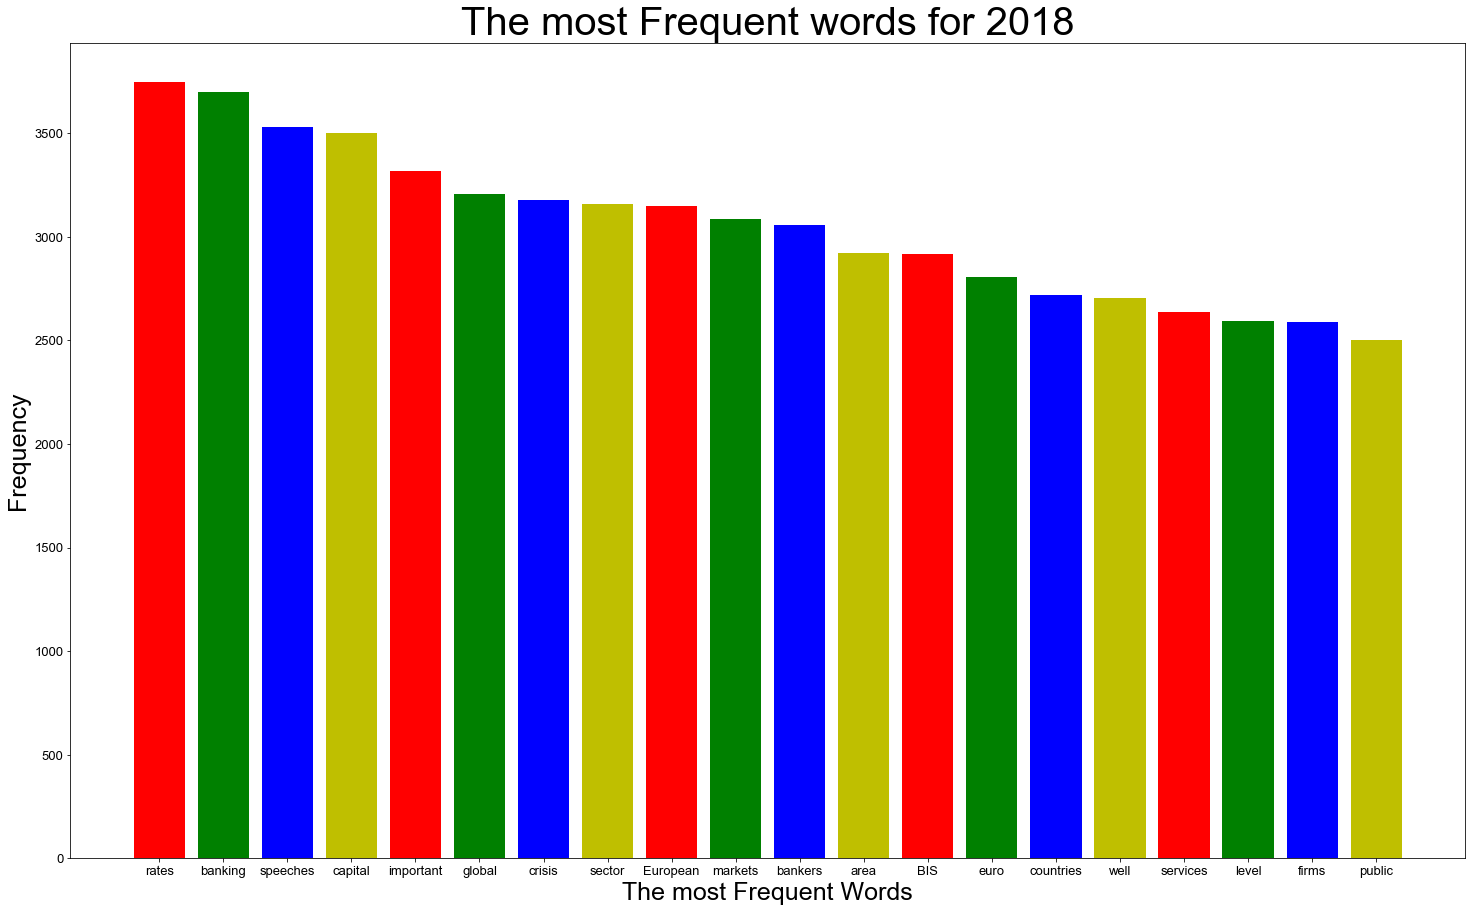

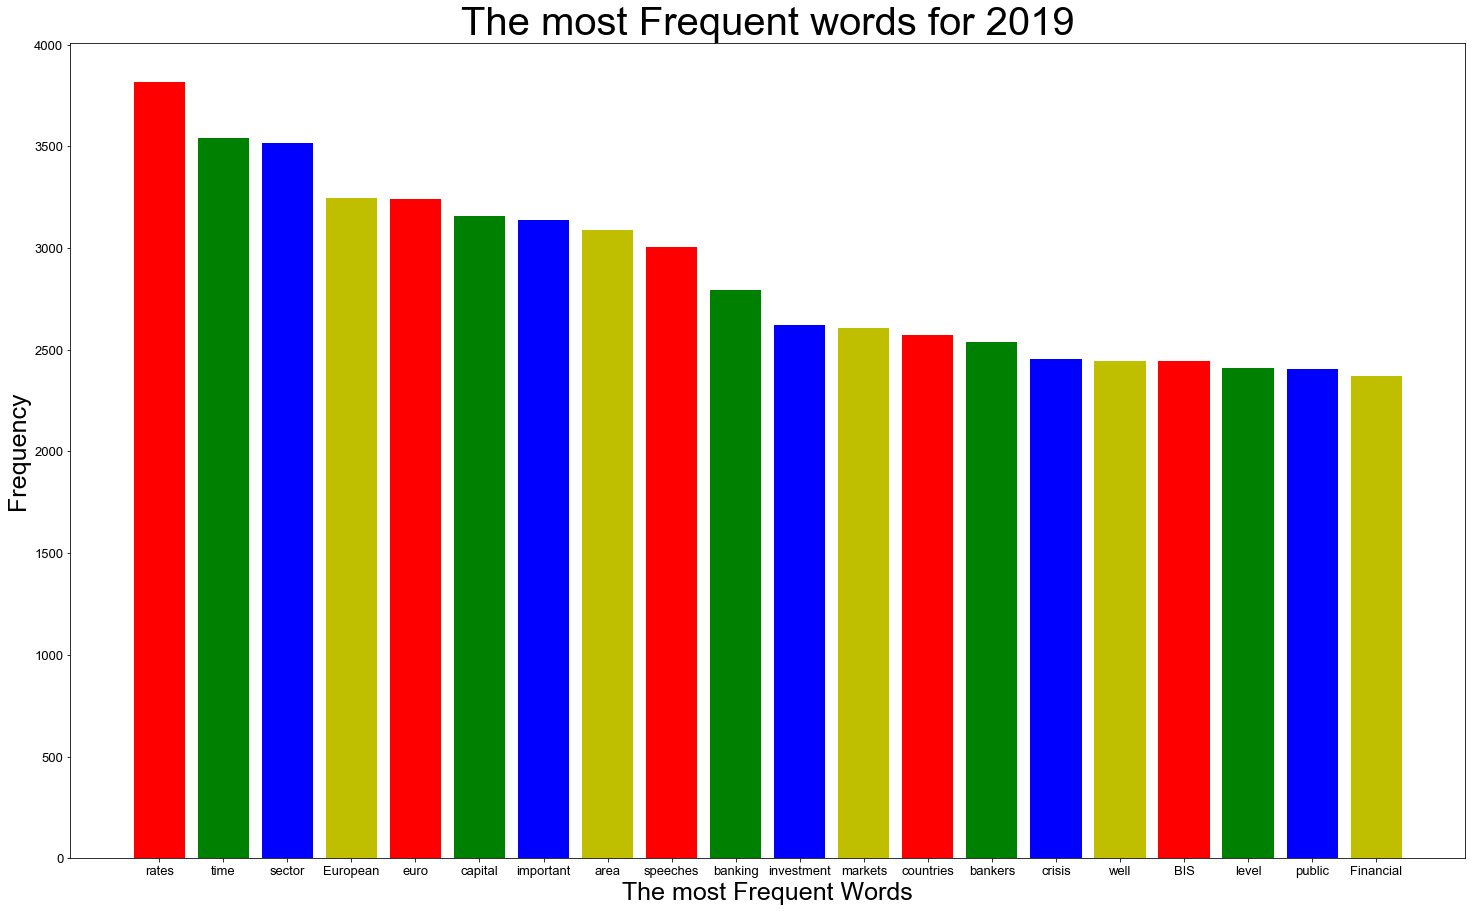

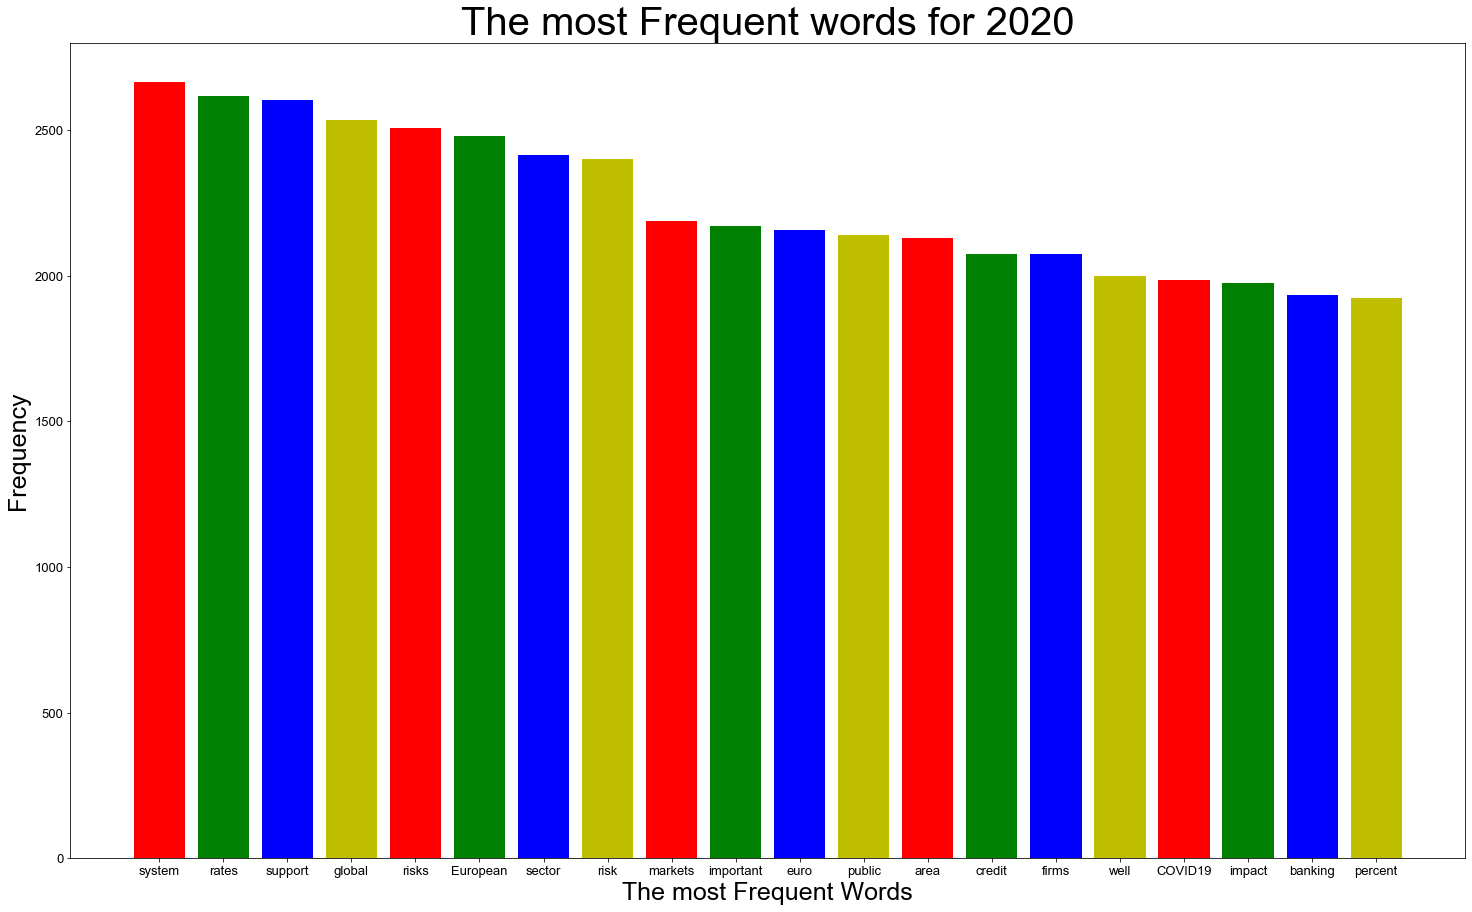

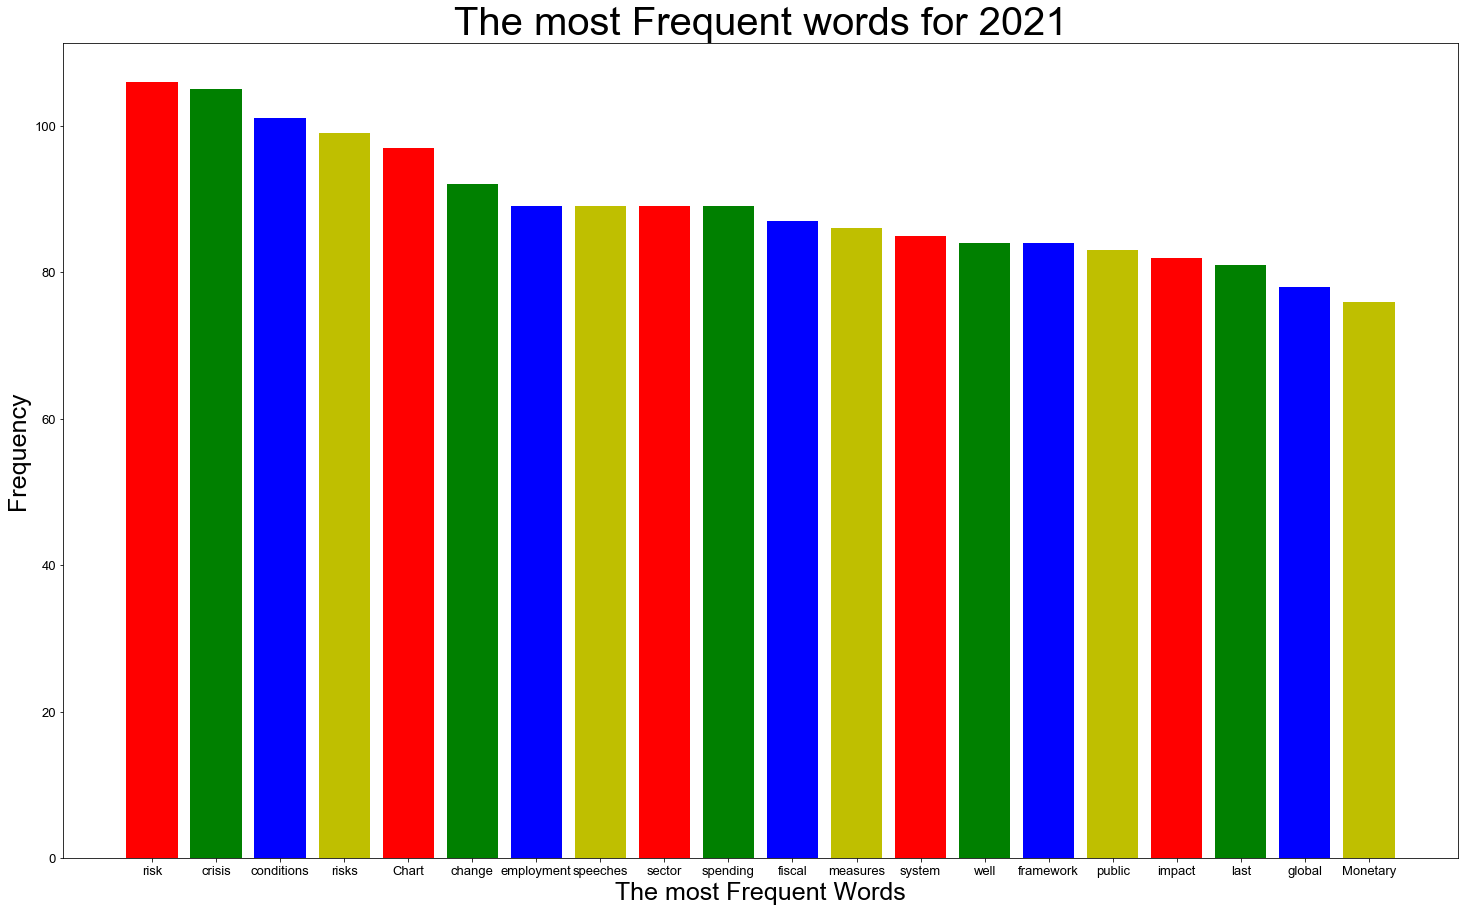

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns



for i in range(len(year_freq)):

        column_names = ['Tokens','Count','year']
        common_tokens_df = pd.DataFrame(columns = column_names)
        words_dict=year_freq[i][10:]
        common_token=[word[0] for word in words_dict]
        common_token_count=[word[1] for word in words_dict]
        common_tokens_df=pd.DataFrame({'Tokens':common_token,'Count':common_token_count})

        plt.rcParams['font.sans-serif']=['Arial Unicode MS']
        plt.rcParams['axes.unicode_minus']=False

        plt.figure(figsize=[25, 15])
        plt.bar(range(len(common_token)), common_token_count,color='rgby',tick_label=common_token)
        plt.tick_params(labelsize=13)
        plt.title('The most Frequent words for {}'.format(2018+i,int),fontdict = {'fontsize' : 40})
        plt.xlabel('The most Frequent Words',fontdict = {'fontsize' : 25})
        plt.ylabel('Frequency',fontdict = {'fontsize' : 25})

        plt.show()
    

 

    
    
    
    

